In [21]:
import pandas as pd
import random
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate Data
fake = Faker()
data = []

for _ in range(500):
    record = {
        "age": random.randint(18, 70),
        "gender": random.choice(["Male", "Female"]),
        "vehicle_make": random.choice(["Toyota", "Honda", "Mazda", "Ford"]),
        "vehicle_year": random.randint(2000, 2022),
        "mileage": random.randint(5000, 300000),
        "accident_history": random.choice(["Yes", "No"]),
        "prior_coverage": random.choice(["Yes", "No"]),
        "location": fake.city(),
        "usage_type": random.choice(["Private", "Commercial"]),
        "risk_class": random.choice(["Low", "Medium", "High"])  # Target label
    }
    data.append(record)

df = pd.DataFrame(data)
df.to_csv('../data/chatbot_simulated_data.csv', index=False)

df.head()


,age,gender,vehicle_make,vehicle_year,mileage,accident_history,prior_coverage,location,usage_type,risk_class
0,67,Female,Toyota,2010,52374,No,No,Riceton,Private,Medium
1,65,Female,Honda,2010,30958,Yes,No,Brandonview,Commercial,High
2,38,Male,Honda,2021,77935,Yes,No,New Julieberg,Commercial,High
3,66,Female,Honda,2019,48243,No,No,East William,Private,High
4,70,Female,Mazda,2016,277928,Yes,Yes,Jamesburgh,Commercial,High


age                 0
gender              0
vehicle_make        0
vehicle_year        0
mileage             0
accident_history    0
prior_coverage      0
location            0
usage_type          0
risk_class          0
dtype: int64


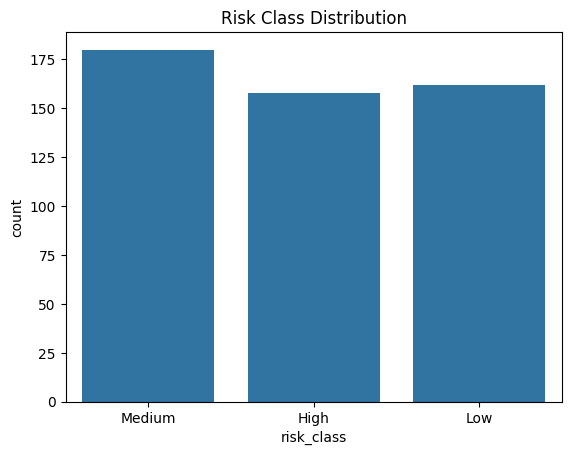

In [22]:
# Handle missing values (shouldn’t have any in fake data)
print(df.isnull().sum())

# Create derived feature: vehicle_age
# df['vehicle_age'] = 2025 - df['vehicle_year']  # Commented out - vehicle_year doesn't exist in real dataset

# Drop vehicle_year if needed
df.drop(columns=['vehicle_year'], inplace=True)

# Check class balance
sns.countplot(x='CLAIM_FLAG', data=df)  # Using CLAIM_FLAG for real dataset
plt.title("Claim Flag Distribution")
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'vehicle_make', 'accident_history', 'prior_coverage', 'location', 'usage_type']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['risk_class'])
y = df['risk_class']

# Encode target
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
import pandas as pd

# Load your dataset from the data folder
df = pd.read_csv('../data\car_insurance_claim.csv')

# Check the first few rows
df.head()


<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\SOOQ ELASER\AppData\Local\Temp\ipykernel_17112\1031782460.py:4: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('../data\car_insurance_claim.csv')


,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [27]:
# Show basic info
df.info()

# Check for nulls
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [28]:
# For the real dataset, CAR_AGE is already available
# No need to create vehicle_age as it's already present as CAR_AGE
print("CAR_AGE column already exists in the dataset")
print(f"CAR_AGE range: {df['CAR_AGE'].min()} to {df['CAR_AGE'].max()}")


CAR_AGE column already exists in the dataset
CAR_AGE range: -3.0 to 28.0


In [29]:
df.drop(columns=['VIN'], errors='ignore', inplace=True)


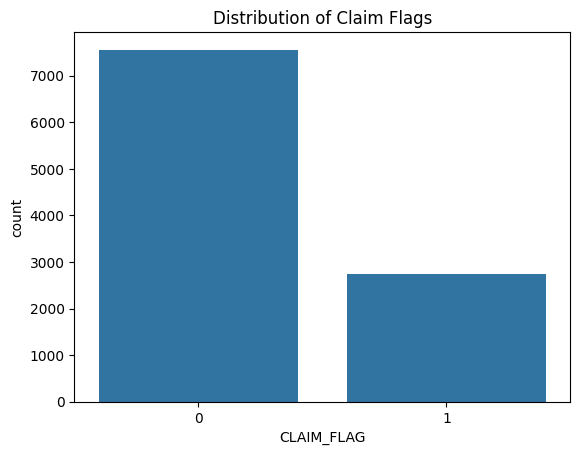

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='CLAIM_FLAG', data=df)  # Using CLAIM_FLAG for real dataset
plt.title("Distribution of Claim Flags")
plt.show()


In [35]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [36]:
from sklearn.model_selection import train_test_split

# Replace 'risk_class' with your actual label
X = df.drop(columns=['CLAIM_FLAG'])
y = df['CLAIM_FLAG']

# Encode target
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost model
model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Train it
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


c:\Users\SOOQ ELASER\underwriting-ai\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:50:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1506
           1       1.00      1.00      1.00       555

    accuracy                           1.00      2061
   macro avg       1.00      1.00      1.00      2061
weighted avg       1.00      1.00      1.00      2061



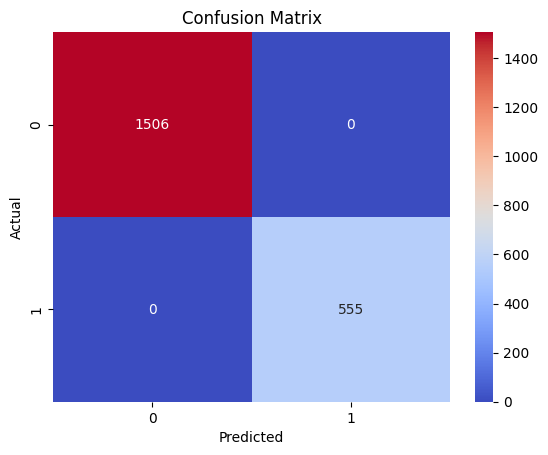

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


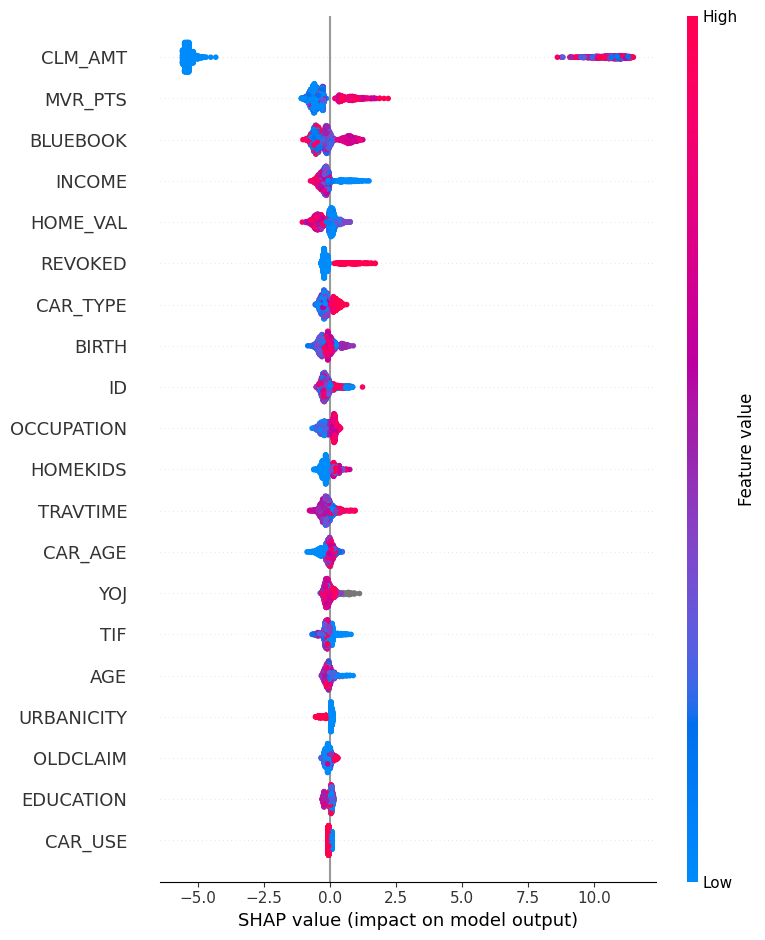

In [39]:
import shap

# Initialize explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Summary plot (top 10 features that influenced model decisions)
shap.summary_plot(shap_values, X_test)


In [40]:
import joblib

# Save model
joblib.dump(model, '../models/X_test.pkl')

# Save encoders too if needed later
joblib.dump(target_encoder, '../models/target_encoder.pkl')


['../models/target_encoder.pkl']

In [42]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Set up stratified k-fold (preserves class balance across folds)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate with accuracy
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))
print("Standard Deviation: {:.4f}".format(np.std(cv_scores)))


c:\Users\SOOQ ELASER\underwriting-ai\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:08:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\SOOQ ELASER\underwriting-ai\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:08:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\SOOQ ELASER\underwriting-ai\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:08:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\SOOQ ELASER\underwriting-ai\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:08:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 

Cross-Validation Accuracy Scores: [0.9995148  1.         0.99805825 0.99902913 0.99854369]
Mean Accuracy: 0.9990
Standard Deviation: 0.0007


In [49]:
X.columns.tolist()


['ID',
 'KIDSDRIV',
 'BIRTH',
 'AGE',
 'HOMEKIDS',
 'YOJ',
 'INCOME',
 'PARENT1',
 'HOME_VAL',
 'MSTATUS',
 'GENDER',
 'EDUCATION',
 'OCCUPATION',
 'TRAVTIME',
 'CAR_USE',
 'BLUEBOOK',
 'TIF',
 'CAR_TYPE',
 'RED_CAR',
 'OLDCLAIM',
 'CLM_FREQ',
 'REVOKED',
 'MVR_PTS',
 'CLM_AMT',
 'CAR_AGE',
 'URBANICITY']

In [55]:
noisy_input = pd.DataFrame([{
    'ID': 99999,
    'KIDSDRIV': 2,
    'BIRTH': 2005,              # Year of birth
    'AGE': 17,                  # Underage
    'HOMEKIDS': 1,
    'YOJ': 0,
    'INCOME': 10000,
    'PARENT1': 0,
    'HOME_VAL': 5000,
    'MSTATUS': 1,
    'GENDER': 1,
    'EDUCATION': 2,
    'OCCUPATION': 4,
    'TRAVTIME': 999,
    'CAR_USE': 1,               # Commercial
    'BLUEBOOK': 2000,
    'TIF': 0,                   # No prior coverage
    'CAR_TYPE': 3,
    'RED_CAR': 1,
    'OLDCLAIM': 50000,
    'CLM_FREQ': 4,
    'REVOKED': 1,
    'MVR_PTS': 9,
    'CLM_AMT': 90000,
    'CAR_AGE': 30,
    'URBANICITY': 1
}])


In [57]:
prediction = model.predict(noisy_input)
print("Prediction (0 = Low Risk, 1 = High Risk):", prediction)


ValueError: feature_names mismatch: ['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'URBANICITY'] ['AGE', 'GENDER', 'vehicle_make', 'mileage', 'accident_history', 'TIF', 'location', 'usage_type', 'CAR_AGE']
expected BLUEBOOK, YOJ, HOME_VAL, CLM_AMT, INCOME, EDUCATION, CAR_TYPE, MSTATUS, ID, RED_CAR, OLDCLAIM, KIDSDRIV, PARENT1, CAR_USE, HOMEKIDS, CLM_FREQ, MVR_PTS, TRAVTIME, OCCUPATION, REVOKED, BIRTH, URBANICITY in input data
training data did not have the following fields: vehicle_make, location, accident_history, mileage, usage_type

In [ ]:
# Generate a noisy test record
noisy_input = pd.DataFrame([{
    "AGE": 17,  # underage
    "GENDER": 1,  # 1 for Male, 0 for Female
    "vehicle_make": 3,
    "mileage": 999999,
    "accident_history": 1,
    "TIF": 1,  # time in force
    "location": 2,
    "usage_type": 1,
    "CAR_AGE": 30  # ancient car
}])

# Predict
noisy_pred = model.predict(noisy_input)
print("Prediction for noisy data (0=Low, 1=High):", noisy_pred)


ValueError: feature_names mismatch: ['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'URBANICITY'] ['AGE', 'GENDER', 'vehicle_make', 'mileage', 'accident_history', 'TIF', 'location', 'usage_type', 'CAR_AGE']
expected BLUEBOOK, YOJ, HOME_VAL, CLM_AMT, INCOME, EDUCATION, CAR_TYPE, MSTATUS, ID, RED_CAR, OLDCLAIM, KIDSDRIV, PARENT1, CAR_USE, HOMEKIDS, CLM_FREQ, MVR_PTS, TRAVTIME, OCCUPATION, REVOKED, BIRTH, URBANICITY in input data
training data did not have the following fields: vehicle_make, location, accident_history, mileage, usage_type

In [58]:
import pandas as pd

def generate_test_input(overrides={}):
    """
    Returns a test input DataFrame that matches the XGBoost model's expected feature schema.
    Use the `overrides` dict to set specific values.
    """
    base = {
        'ID': 99999,
        'KIDSDRIV': 2,
        'BIRTH': 2006,
        'AGE': 17,
        'HOMEKIDS': 1,
        'YOJ': 0,
        'INCOME': 5000,
        'PARENT1': 0,
        'HOME_VAL': 8000,
        'MSTATUS': 1,
        'GENDER': 1,
        'EDUCATION': 2,
        'OCCUPATION': 4,
        'TRAVTIME': 999,
        'CAR_USE': 1,
        'BLUEBOOK': 2000,
        'TIF': 0,
        'CAR_TYPE': 3,
        'RED_CAR': 1,
        'OLDCLAIM': 30000,
        'CLM_FREQ': 4,
        'REVOKED': 1,
        'MVR_PTS': 9,
        'CLM_AMT': 90000,
        'CAR_AGE': 30,
        'URBANICITY': 1
    }
    base.update(overrides)
    return pd.DataFrame([base])


In [62]:
# Use default extreme input
noisy_input = generate_test_input()

# Or override only what you want
noisy_input = generate_test_input({
    'AGE': 18,
    'CLM_AMT': 70000,
    'MVR_PTS': 5,
    'REVOKED': 1,
    'INCOME': 10000
})

# Predict
noisy_pred = model.predict(noisy_input)
print("Noisy input prediction (0=Low, 1=High):", noisy_pred)


Noisy input prediction (0=Low, 1=High): [1]


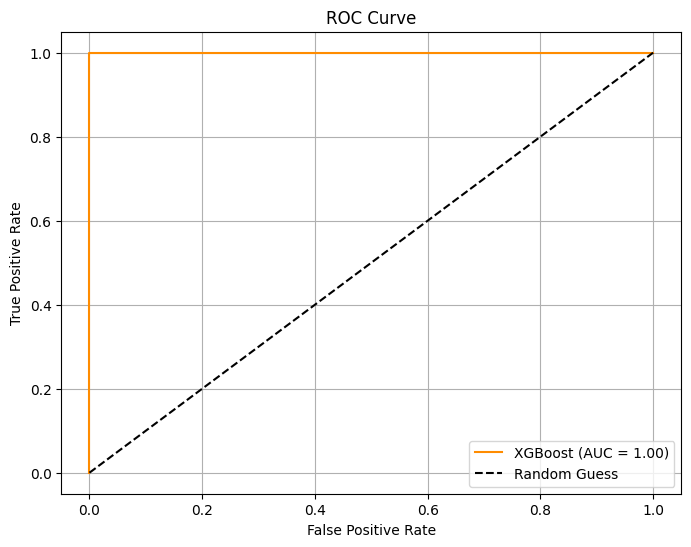

In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities (not just 0/1)
y_probs = model.predict_proba(X_test)[:, 1]

# Generate FPR, TPR for ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [95]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen’s Kappa Score:", round(kappa, 4))


Cohen’s Kappa Score: 1.0


In [78]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", round(mse, 4))


Mean Squared Error (MSE): 0.0


In [96]:
print("Evaluation Summary:")
print(f"AUC Score: {roc_auc:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


Evaluation Summary:
AUC Score: 1.0000
Cohen's Kappa: 1.0000
Mean Squared Error: 0.0000
